### Show me stock market performance for the last eleven months of bank of America, Wells Fargo, Goldman Sachs and Morgan Stanley. Calculate the moving average to identify trends and patterns. Calculate volatily and check if there is any correlation of stock prices between the banks.

In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime

In [39]:
import matplotlib.pyplot as plt

In [26]:
start_date = datetime.now() - pd.DateOffset(months=11)
end_date = datetime.now()

In [48]:
tickers = ['BAC', 'WFC', 'MS', 'GS']

In [49]:
df_list = []

for ticker in tickers:
    data = yf.download(ticker, start = start_date, end = end_date)
    df_list.append(data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [57]:
stock_market_bank_data = pd.concat(df_list, keys = tickers, names = ['Bank_name', 'Date'])
stock_market_bank_data.head()

Open       High        Low      Close  Adj Close  \
Bank_name Date                                                                
BAC       2022-12-19  31.760000  32.230000  31.730000  32.060001  31.340071   
          2022-12-20  32.400002  32.580002  32.139999  32.189999  31.467150   
          2022-12-21  32.520000  32.869999  32.410000  32.680000  31.946146   
          2022-12-22  32.520000  32.580002  31.870001  32.389999  31.662659   
          2022-12-23  32.400002  32.580002  32.189999  32.470001  31.740862   

                        Volume  
Bank_name Date                  
BAC       2022-12-19  38374100  
          2022-12-20  35561100  
          2022-12-21  32544000  
          2022-12-22  30234400  
          2022-12-23  21378600

In [58]:
stock_market_bank_data.reset_index(inplace=True)

In [59]:
stock_market_bank_data.head()

,Bank_name,Date,Open,High,Low,Close,Adj Close,Volume
0,BAC,2022-12-19,31.760000,32.230000,31.730000,32.060001,31.340071,38374100
1,BAC,2022-12-20,32.400002,32.580002,32.139999,32.189999,31.467150,35561100
2,BAC,2022-12-21,32.520000,32.869999,32.410000,32.680000,31.946146,32544000
3,BAC,2022-12-22,32.520000,32.580002,31.870001,32.389999,31.662659,30234400
4,BAC,2022-12-23,32.400002,32.580002,32.189999,32.470001,31.740862,21378600


In [32]:
stock_market_bank_data.shape

(1155, 8)

In [33]:
stock_market_bank_data.dtypes

Tickers              object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [34]:
stock_market_bank_data.isnull().sum()

Tickers      0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

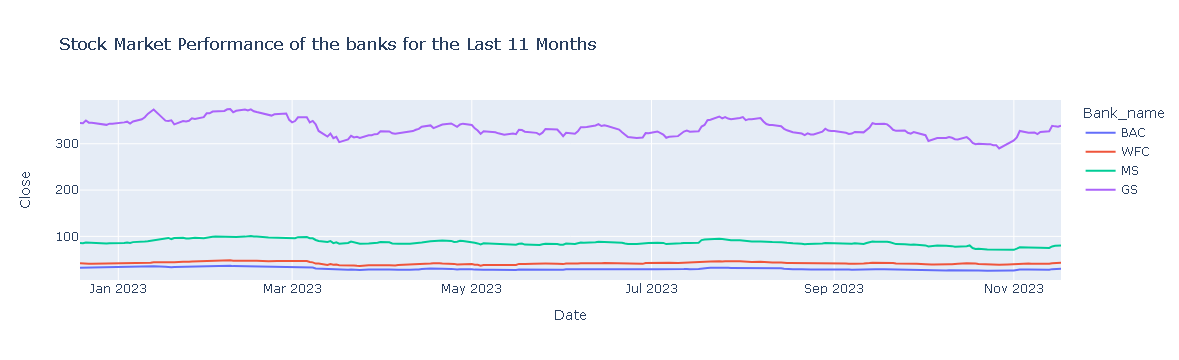

In [60]:
import plotly.express as px
fig = px.line(stock_market_bank_data, x='Date', 
              y='Close', 
              color='Bank_name', 
              title="Stock Market Performance of the banks for the Last 11 Months")
fig.show()

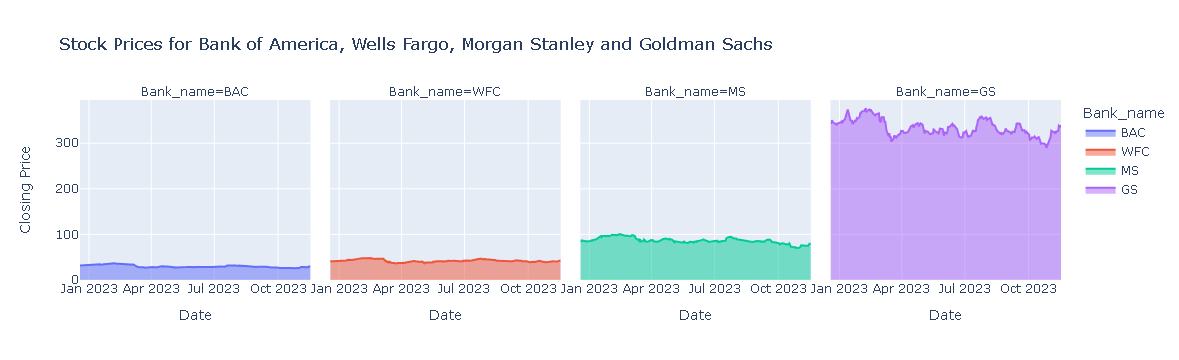

In [61]:
fig = px.area(stock_market_bank_data, x='Date', y='Close', color='Bank_name',
              facet_col='Bank_name',
              labels={'Date':'Date', 'Close':'Closing Price', 'Ticker':'Company'},
              title='Stock Prices for Bank of America, Wells Fargo, Morgan Stanley and Goldman Sachs')
fig.show()

In [62]:
stock_market_bank_data['MA10'] = stock_market_bank_data.groupby('Bank_name')['Close'].rolling(window=10).mean().reset_index(0, drop=True)
stock_market_bank_data['MA20'] = stock_market_bank_data.groupby('Bank_name')['Close'].rolling(window=20).mean().reset_index(0, drop=True)

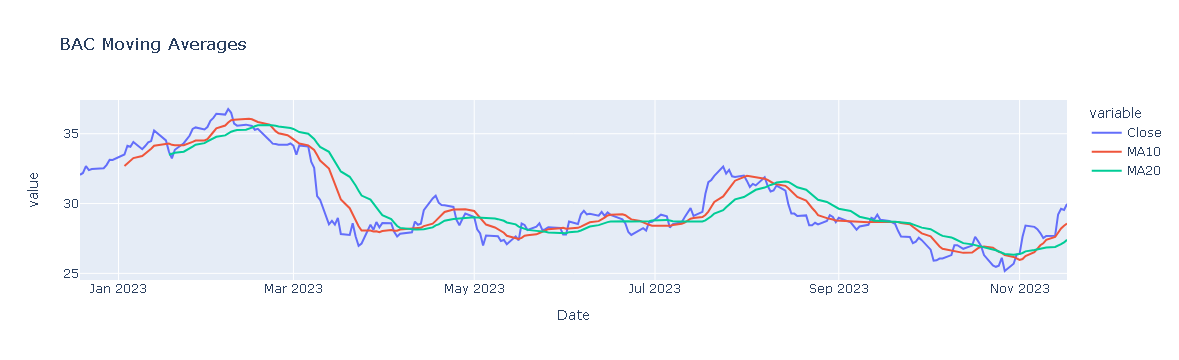

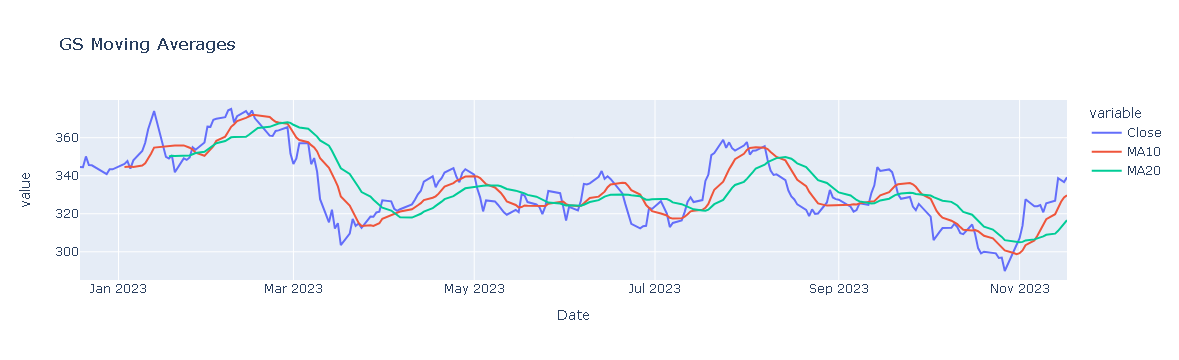

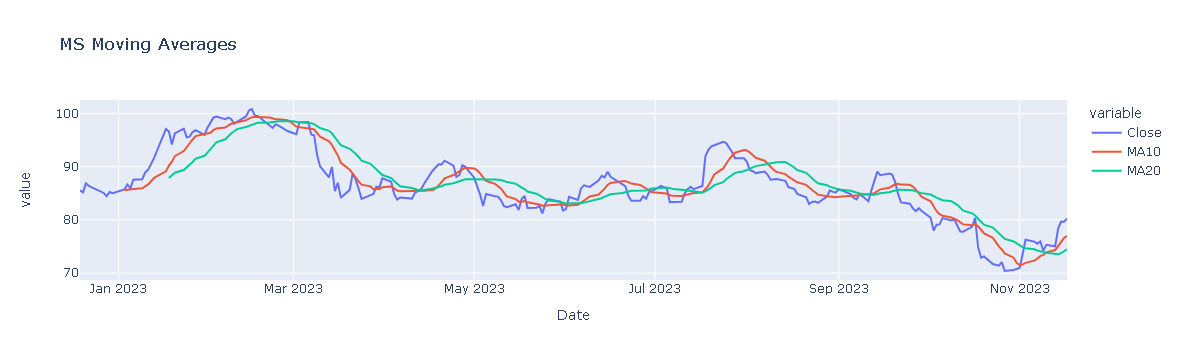

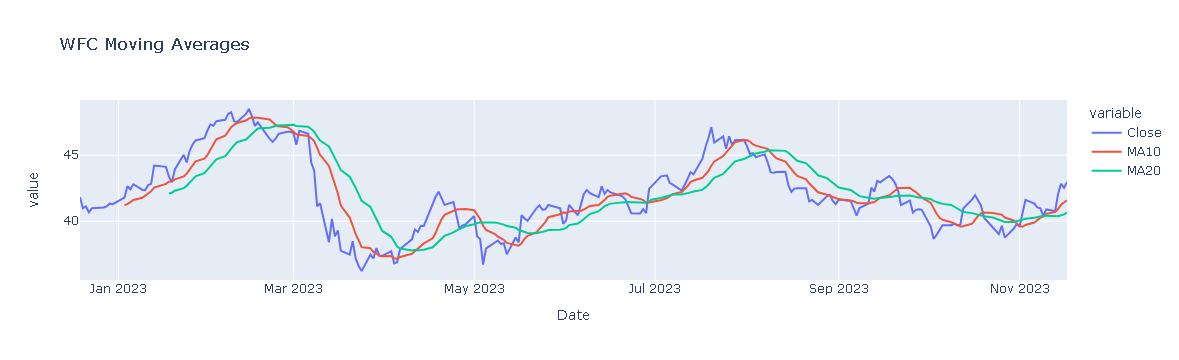

In [64]:
for Bank, group in stock_market_bank_data.groupby('Bank_name'):
    fig = px.line(group, x='Date', y=['Close', 'MA10', 'MA20'], 
                  title=f"{Bank} Moving Averages")
    fig.show()

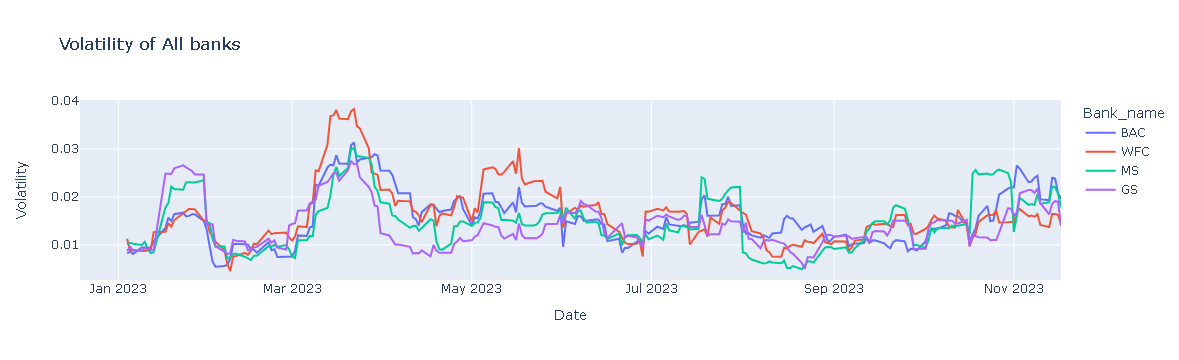

In [67]:
stock_market_bank_data['Volatility'] = stock_market_bank_data.groupby('Bank_name')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)
fig = px.line(stock_market_bank_data, x='Date', y='Volatility', 
              color='Bank_name', 
              title='Volatility of All banks')
fig.show()

In [ ]:
tickers = ['BAC', 'WFC', 'MS', 'GS']

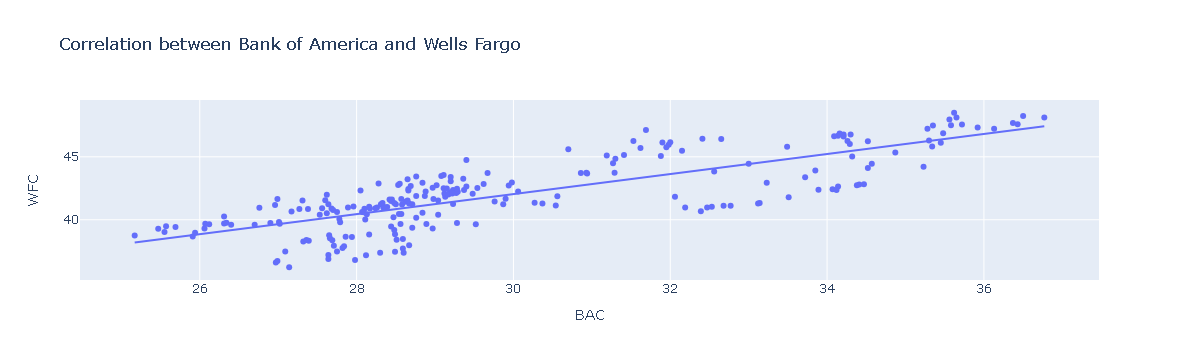

In [70]:
Bank_of_America = stock_market_bank_data.loc[stock_market_bank_data['Bank_name'] == 'BAC', ['Date', 'Close']].rename(columns={'Close': 'BAC'})
Wells_fargo = stock_market_bank_data.loc[stock_market_bank_data['Bank_name'] == 'WFC', ['Date', 'Close']].rename(columns={'Close': 'WFC'})
stock_corr = pd.merge(Bank_of_America, Wells_fargo, on='Date')

# create a scatter plot to visualize the correlation
fig = px.scatter(stock_corr, x='BAC', y='WFC', 
                 trendline='ols', 
                 title='Correlation between Bank of America and Wells Fargo')
fig.show()

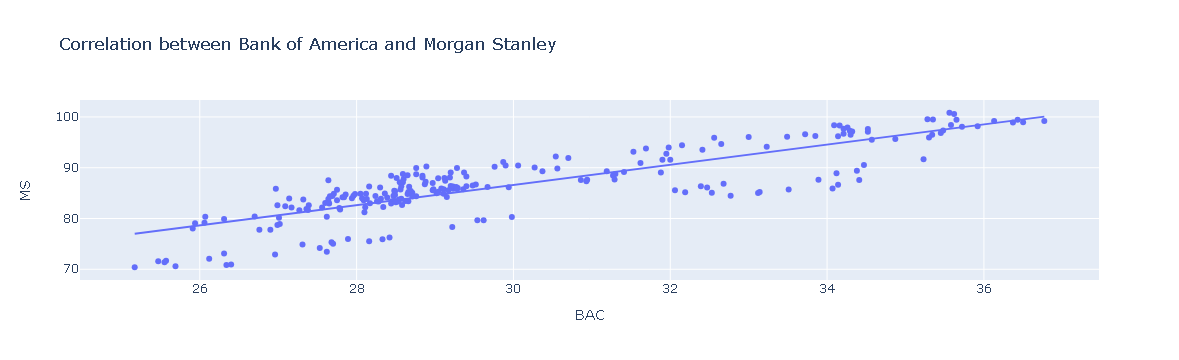

In [71]:
Bank_of_America = stock_market_bank_data.loc[stock_market_bank_data['Bank_name'] == 'BAC', ['Date', 'Close']].rename(columns={'Close': 'BAC'})
Morgan_Stanley = stock_market_bank_data.loc[stock_market_bank_data['Bank_name'] == 'MS', ['Date', 'Close']].rename(columns={'Close': 'MS'})
stock_corr = pd.merge(Bank_of_America, Morgan_Stanley, on='Date')

# create a scatter plot to visualize the correlation
fig = px.scatter(stock_corr, x='BAC', y='MS', 
                 trendline='ols', 
                 title='Correlation between Bank of America and Morgan Stanley')
fig.show()

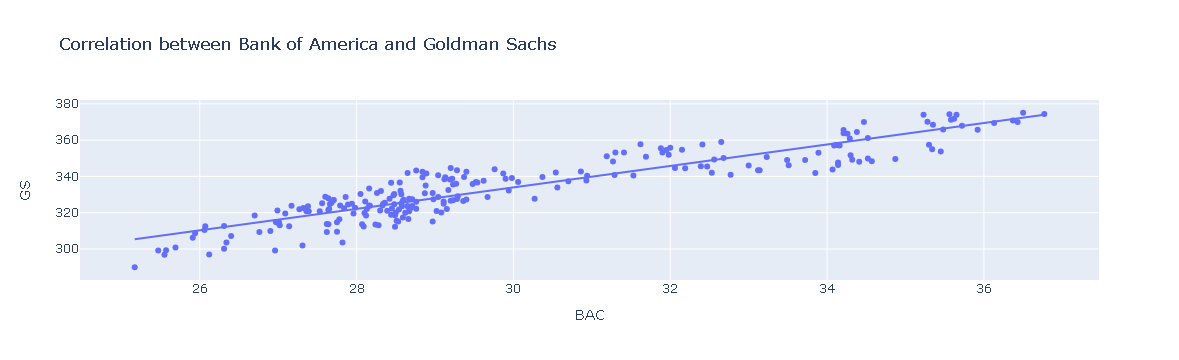

In [72]:
Bank_of_America = stock_market_bank_data.loc[stock_market_bank_data['Bank_name'] == 'BAC', ['Date', 'Close']].rename(columns={'Close': 'BAC'})
Goldman_Sachs = stock_market_bank_data.loc[stock_market_bank_data['Bank_name'] == 'GS', ['Date', 'Close']].rename(columns={'Close': 'GS'})
stock_corr = pd.merge(Bank_of_America, Goldman_Sachs, on='Date')

# create a scatter plot to visualize the correlation
fig = px.scatter(stock_corr, x='BAC', y='GS', 
                 trendline='ols', 
                 title='Correlation between Bank of America and Goldman Sachs')
fig.show()

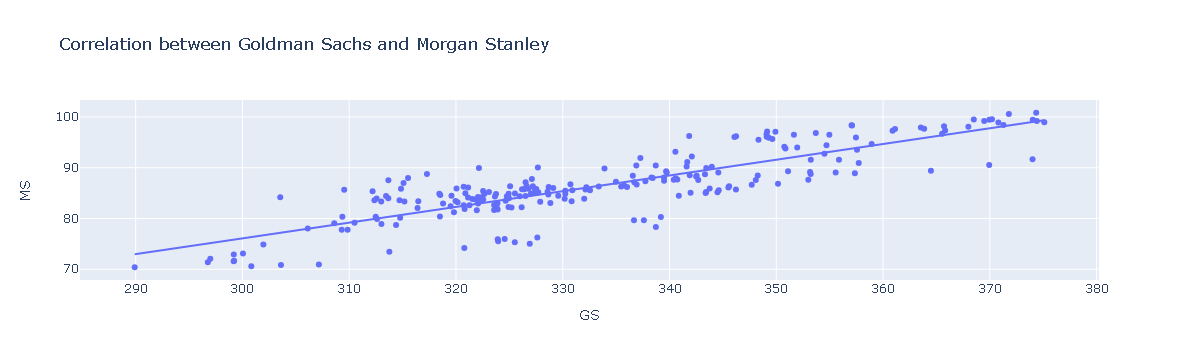

In [74]:
Goldman_Sachs = stock_market_bank_data.loc[stock_market_bank_data['Bank_name'] == 'GS', ['Date', 'Close']].rename(columns={'Close': 'GS'})
Morgan_Stanley = stock_market_bank_data.loc[stock_market_bank_data['Bank_name'] == 'MS', ['Date', 'Close']].rename(columns={'Close': 'MS'})
stock_corr = pd.merge(Goldman_Sachs, Morgan_Stanley, on='Date')

# create a scatter plot to visualize the correlation
fig = px.scatter(stock_corr, x='GS', y='MS', 
                 trendline='ols', 
                 title='Correlation between Goldman Sachs and Morgan Stanley')
fig.show()

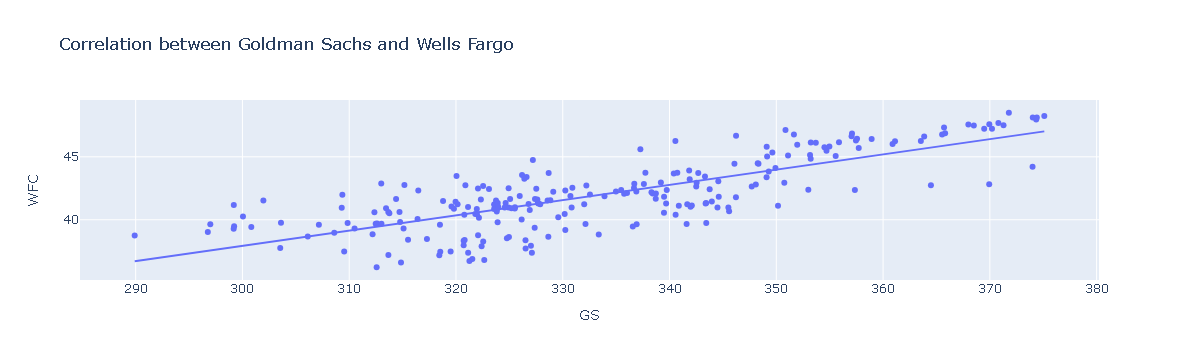

In [76]:
Goldman_Sachs = stock_market_bank_data.loc[stock_market_bank_data['Bank_name'] == 'GS', ['Date', 'Close']].rename(columns={'Close': 'GS'})
wells_fargo = stock_market_bank_data.loc[stock_market_bank_data['Bank_name'] == 'WFC', ['Date', 'Close']].rename(columns={'Close': 'WFC'})
stock_corr = pd.merge(Goldman_Sachs, wells_fargo, on='Date')

# create a scatter plot to visualize the correlation
fig = px.scatter(stock_corr, x='GS', y='WFC', 
                 trendline='ols', 
                 title='Correlation between Goldman Sachs and Wells Fargo')
fig.show()